Accuracy: 0.7556
Precision: 0.8333
Recall: 0.7556
F1 Score: 0.7503
Cohen Kappa Score: 0.6431
Matthews Corrcoef: 0.6831
		Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.44      0.89      0.59         9
           2       0.91      0.50      0.65        20

    accuracy                           0.76        45
   macro avg       0.78      0.80      0.75        45
weighted avg       0.85      0.76      0.76        45



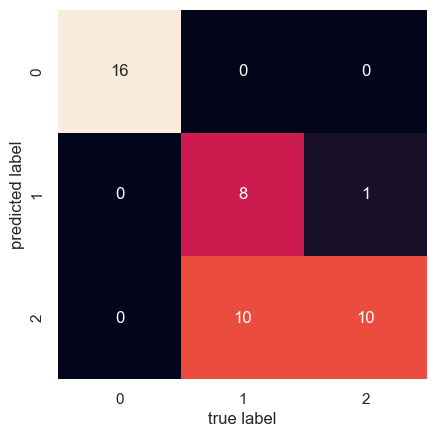

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

iris = load_iris()
X, y = iris.data, iris.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
clf = RidgeClassifier(tol=1e-2, solver="sag")
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

from sklearn import metrics

print("Accuracy:", np.round(metrics.accuracy_score(ytest, ypred), 4))
print(
    "Precision:", np.round(metrics.precision_score(ytest, ypred, average="weighted"), 4)
)
print("Recall:", np.round(metrics.recall_score(ytest, ypred, average="weighted"), 4))
print("F1 Score:", np.round(metrics.f1_score(ytest, ypred, average="weighted"), 4))
print("Cohen Kappa Score:", np.round(metrics.cohen_kappa_score(ytest, ypred), 4))
print("Matthews Corrcoef:", np.round(metrics.matthews_corrcoef(ytest, ypred), 4))
print("\t\tClassification Report:\n", metrics.classification_report(ypred, ytest))


from sklearn.metrics import confusion_matrix
from io import BytesIO  # neded for plot
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.savefig("Confusion.jpg")
# Save SVG in a fake file object.
f = BytesIO()
plt.savefig(f, format="svg")